In [1]:
import pandas as pd
import seaborn as sns

Here our objective as a business manager is to try and find out the weak areas where we can work to make more profit.

Also, what business problems can be derived by exploring the data?

In [2]:
#Loading the dataset
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.groupby('Region')['Profit'].mean()

Region
Central    17.092709
East       32.135808
South      28.857673
West       33.849032
Name: Profit, dtype: float64

We noticed Central region has very low profit compared to the other regions so we dive deeper into it.

Now we notice the category of products that return the most profit and if the other discrete variables have any impact on our profit.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

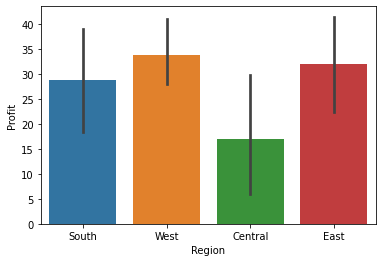

In [21]:
sns.barplot(x ='Region', y='Profit', data = df)

In [9]:
df.groupby('Category')['Profit'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

In [35]:
df.groupby(['Category'])['Profit'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

In [49]:
df.groupby(['Region','Category'])['Profit'].mean()

Region   Category       
Central  Furniture          -5.968918
         Office Supplies     6.244712
         Technology         80.231981
East     Furniture           5.068496
         Office Supplies    23.957114
         Technology         88.714084
South    Furniture          20.395199
         Office Supplies    20.086827
         Technology         68.231506
West     Furniture          16.272914
         Office Supplies    27.733183
         Technology         73.962687
Name: Profit, dtype: float64

In [30]:
df.groupby(['Category','Sub-Category'])['Profit'].mean(()

Category         Sub-Category
Furniture        Bookcases       -15.230509
                 Chairs           43.095894
                 Furnishings      13.645918
                 Tables          -55.565771
Office Supplies  Appliances       38.922758
                 Art               8.200737
                 Binders          19.843574
                 Envelopes        27.418019
                 Fasteners         4.375660
                 Labels           15.236962
                 Paper            24.856620
                 Storage          25.152277
                 Supplies         -6.258418
Technology       Accessories      54.111788
                 Copiers         817.909190
                 Machines         29.432669
                 Phones           50.073938
Name: Profit, dtype: float64

Furniture items seems to be least profitable of all. With two sub-categories returning negative loss.

Now we see what category of items dominate different regions

In [50]:
df.groupby(['Region','Category'])['Profit'].count()

Region   Category       
Central  Furniture           481
         Office Supplies    1422
         Technology          420
East     Furniture           601
         Office Supplies    1712
         Technology          535
South    Furniture           332
         Office Supplies     995
         Technology          293
West     Furniture           707
         Office Supplies    1897
         Technology          599
Name: Profit, dtype: int64

Here we observe that even though Central has more orders for furnitures than the Southern region it still has a mean loss from it. So we see what sub-categories do the consumers in central usually order

In [59]:
subcount = df.groupby(['Region','Category','Sub-Category'])['Quantity'].count()

In [60]:
subcount

Region   Category         Sub-Category
Central  Furniture        Bookcases        50
                          Chairs          154
                          Furnishings     205
                          Tables           72
         Office Supplies  Appliances      123
                                         ... 
West     Office Supplies  Supplies         69
         Technology       Accessories     258
                          Copiers          25
                          Machines         39
                          Phones          277
Name: Quantity, Length: 68, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='Profit'>

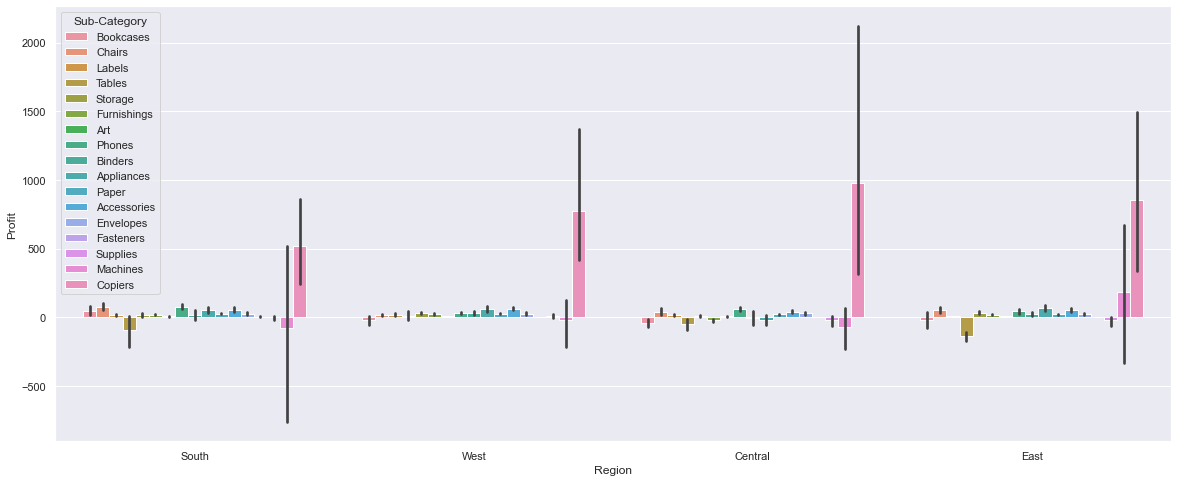

In [66]:
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(x= 'Region', y='Profit', hue= 'Sub-Category', data = df)

* Technology seems to be dominating profits across region. 

* Storage items cause losses in every region except West

* Bookcases also seem to incur losses everywhere except the South